In [19]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [20]:

# Parameters for the dataset
n_samples = 1000
n_features = 6000
n_informative = 100
n_redundant = 0
n_repeated = 0
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=n_repeated,
    n_classes=2,
    random_state=42,
    n_clusters_per_class=2,
    shuffle=False,
    #shift=25,
)


In [21]:
(X < 0).sum()

3000163

In [22]:
# X_log2 = np.log2(X + 1)
# noise = np.random.normal(0, 0.1, X_log2.shape)
# X_log2_hetero = X_log2 + noise

In [23]:

X = pd.DataFrame(X, columns=[f'Protein_{i+1}' for i in range(n_features)])

X

,Protein_1,Protein_2,Protein_3,Protein_4,Protein_5,Protein_6,Protein_7,Protein_8,Protein_9,Protein_10,...,Protein_5991,Protein_5992,Protein_5993,Protein_5994,Protein_5995,Protein_5996,Protein_5997,Protein_5998,Protein_5999,Protein_6000
0,-3.435693,8.166160,0.650801,8.180446,3.392508,-0.266024,8.477774,6.085660,-4.343291,4.553184,...,-0.186669,-0.568007,-0.908760,-0.570648,-0.435803,1.394635,-1.048285,-0.525810,0.314138,0.842952
1,-4.898017,-1.008974,-12.300792,-6.646057,2.254581,-3.985858,-0.125482,1.490866,3.737731,15.668323,...,-1.224635,-0.616807,1.893995,0.160635,-0.105378,0.341358,-0.793102,-1.522919,-0.136180,0.448028
2,4.772507,-0.110435,-7.632331,4.886376,5.541666,8.679653,-3.564006,0.021013,-8.227912,4.098106,...,0.003649,-0.864503,0.082172,0.750346,-0.293187,-1.330439,-0.614648,0.128114,-0.963496,0.787845
3,4.362562,-6.870610,-8.472198,-6.409259,-1.192005,9.943076,-6.116228,-6.089435,-6.300710,-12.556136,...,1.025803,2.294366,-0.602961,-0.652285,1.788573,-0.535203,-1.353915,1.485025,0.747110,1.504920
4,-2.322346,0.089983,3.222872,4.302158,3.920763,-2.350491,1.579445,-11.184206,-1.171807,-1.903559,...,-1.249448,-1.158817,0.281918,0.551361,1.750604,-0.623323,0.622269,0.444674,-0.000118,-1.140718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.255356,-0.010109,-2.256439,-12.747587,7.641946,-9.880928,-7.299517,4.562724,-7.840038,4.236688,...,-1.164338,-0.154307,2.264317,1.824942,-0.719440,-1.474435,2.042440,0.134504,0.204991,0.175967
996,-4.460098,0.589179,-6.346120,-4.236383,-4.998456,-5.731430,7.822987,-1.253164,0.714892,-3.593447,...,-1.351134,-0.549987,-0.650100,1.090247,0.174308,2.044572,1.552719,-0.638580,-0.637714,0.993524
997,-10.008286,-5.151040,5.891902,0.448906,3.422100,-9.654506,10.585313,3.167172,4.484175,-5.116098,...,-0.222002,-0.119509,-0.921033,0.997987,-0.997511,-0.216180,-0.286525,-1.945014,1.317363,-0.145228
998,4.150907,1.174436,0.330895,1.041951,-6.741198,-2.916488,-8.081084,-4.076600,2.268864,3.235925,...,-0.449098,1.522489,0.207114,-1.662945,0.321576,-1.652294,-0.447765,0.915813,0.386027,2.141492


In [24]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [25]:
from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

In [26]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

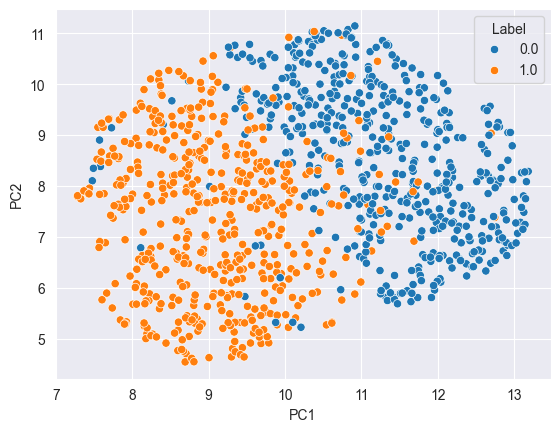

In [27]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgboost.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),  # [0.001, 0.01, 0.1, 1]
    'max_depth': [3, 5, 7, 10],
    'max_leaves': [0, 2, 4, 6, 8],  # 0 means no limit
    'reg_alpha': [0.1, 0.5, 1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3, 4.5],  # L2 regularization
    'n_estimators': [100, 250, 500],
}

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END learning_rate=0.001, max_depth=5, max_leaves=4, n_estimators=500, reg_alpha=0.1, reg_lambda=1.5; total time=  25.1s
[CV] END learning_rate=0.01, max_depth=5, max_leaves=6, n_estimators=100, reg_alpha=0.1, reg_lambda=1; total time=   9.3s
[CV] END learning_rate=1.0, max_depth=10, max_leaves=4, n_estimators=500, reg_alpha=1, reg_lambda=2; total time=  12.4s
[CV] END learning_rate=1.0, max_depth=5, max_leaves=6, n_estimators=500, reg_alpha=0.1, reg_lambda=2; total time=  12.4s


/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                                        'max_depth': [3, 5, 7, 10],
                                        'max_leaves': [0, 2, 4, 6, 8],
                                        'n_estimators': [100, 250, 500],
                                        'reg_alpha': [0.1, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2, 3, 4.5]},
                   random_state=42, scoring='accuracy', verbose=2)

In [32]:
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))

clf = random_search.best_estimator_

Best parameters found:  {'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 250, 'max_leaves': 8, 'max_depth': 3, 'learning_rate': 0.01}
Best cross-validation accuracy: 0.64


In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, scoring='roc_auc', cv=5, n_jobs=1)

array([0.7223    , 0.7549    , 0.757     , 0.6913    , 0.71687169])

In [34]:
from sklearn.feature_selection import f_classif

f_statistics, pvalues = f_classif(X, y)

In [35]:
from sklearn.inspection import permutation_importance


importances = permutation_importance(
    clf,
    X.values,
    y,
    scoring="neg_log_loss",
    n_jobs=1,
    #max_samples=0.5,
    n_repeats=3,
)

In [36]:
importances['importances_mean'].shape

(6000,)

In [37]:
np.abs(X[y == 1].mean(axis=0) - X[y == 0].mean(axis=0))

Protein_1       0.449610
Protein_2       0.171962
Protein_3       1.047580
Protein_4       0.149161
Protein_5       1.213110
                  ...   
Protein_5996    0.077153
Protein_5997    0.027629
Protein_5998    0.069923
Protein_5999    0.020111
Protein_6000    0.132510
Length: 6000, dtype: float64

In [38]:
feature_importances = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": importances['importances_mean'],
        "pvalue": pvalues,
        "feature_diff": np.abs(X[y == 1].mean(axis=0) - X[y == 0].mean(axis=0)).values
    }
)

In [39]:
feature_importances.sort_values("pvalue", ascending=True)

,feature,importance,pvalue,feature_diff
13,Protein_14,0.034738,3.480136e-13,2.576504
60,Protein_61,0.032208,7.987056e-11,2.409246
47,Protein_48,0.027698,3.995640e-09,2.227215
68,Protein_69,0.023838,9.049424e-09,2.204364
66,Protein_67,0.015694,1.394999e-08,2.022964
...,...,...,...,...
1145,Protein_1146,0.000000,9.996192e-01,0.000031
4182,Protein_4183,0.000000,9.997108e-01,0.000023
454,Protein_455,0.000000,9.998611e-01,0.000011
5620,Protein_5621,0.000000,9.998892e-01,0.000009


In [40]:
feature_importances['feature'] = feature_importances['feature'].astype(str)

<Axes: xlabel='importance', ylabel='feature'>

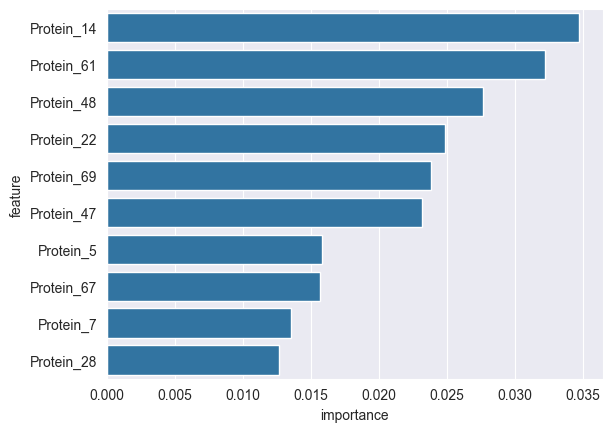

In [41]:
sns.barplot(x="importance", y="feature", data=feature_importances.sort_values("importance", ascending=False).head(10))

In [42]:
from dpks.interpretation import FeatureImportance

importance_calculator = FeatureImportance(
    n_iterations=3,
    feature_names=X.columns.values,
)

importance_calculator.fit(clf, X.values)

In [43]:
pca = UMAP(n_components=2, n_neighbors=5)

components = pca.fit_transform(importance_calculator.local_explanations.T)

In [44]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

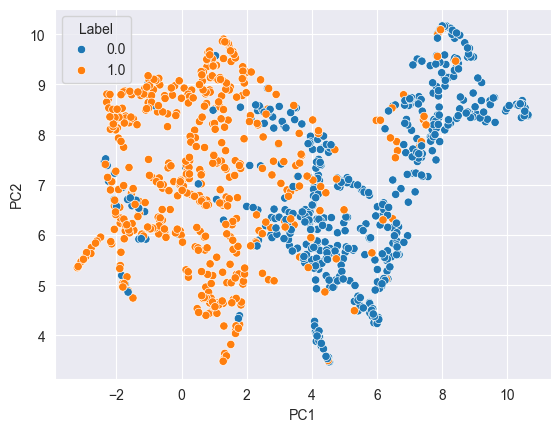

In [45]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [46]:
feature_importances['loss_importance'] = importance_calculator.global_explanations

<Axes: xlabel='loss_importance', ylabel='feature'>

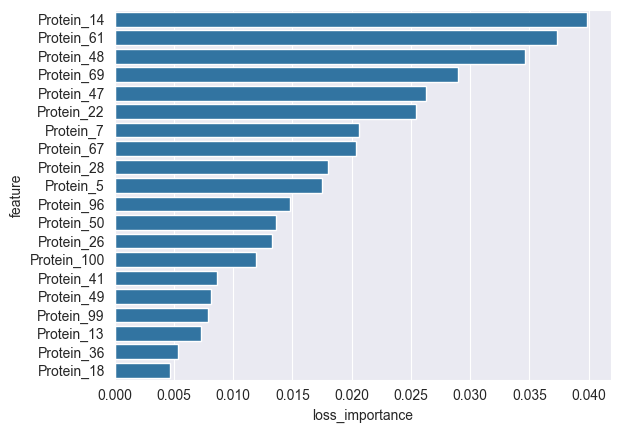

In [47]:
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(20),
    x="loss_importance",
    y="feature"
)

In [48]:
feature_importances['feature_num'] = feature_importances['feature'].str.split("_").str[-1].astype(int)

In [49]:
feature_importances['feature_type'] = np.where(feature_importances['feature_num'] <= 100, 1, 0)

In [50]:
import shap

In [52]:
#explainer = shap.LinearExplainer(clf, X)
explainer = shap.TreeExplainer(clf)
#explainer = shap.Explainer(clf)
shap_values = explainer(X)

In [53]:
feature_importances['shap_importance'] = np.mean(abs(shap_values.values), axis=0)

In [54]:
feature_importances.sort_values("shap_importance", ascending=False)

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance
13,Protein_14,0.034738,3.480136e-13,2.576504,0.039863,14,1,0.165079
60,Protein_61,0.032208,7.987056e-11,2.409246,0.037326,61,1,0.155875
47,Protein_48,0.027698,3.995640e-09,2.227215,0.034664,48,1,0.137524
68,Protein_69,0.023838,9.049424e-09,2.204364,0.028961,69,1,0.117296
46,Protein_47,0.023184,2.141776e-07,2.030559,0.026261,47,1,0.102579
...,...,...,...,...,...,...,...,...
2062,Protein_2063,0.000000,5.711719e-01,0.036921,0.000000,2063,0,0.000000
2061,Protein_2062,0.000000,9.876681e-01,0.001002,0.000000,2062,0,0.000000
2060,Protein_2061,0.000000,3.010702e-01,0.069245,0.000000,2061,0,0.000000
2059,Protein_2060,0.000000,3.424649e-01,0.059296,0.000000,2060,0,0.000000


<Axes: xlabel='shap_importance', ylabel='feature'>

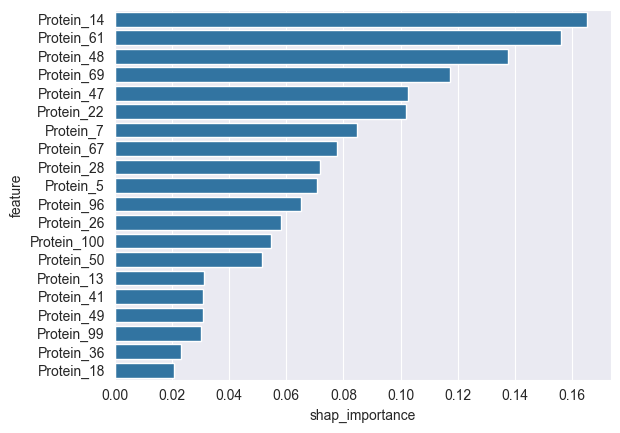

In [55]:
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(20),
    x="shap_importance",
    y="feature"
)

In [56]:
feature_importances

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance
0,Protein_1,0.000000,0.207079,0.449610,0.000000,1,1,0.000000
1,Protein_2,0.000000,0.634612,0.171962,0.000000,2,1,0.000000
2,Protein_3,0.000000,0.003356,1.047580,0.000000,3,1,0.000000
3,Protein_4,0.000000,0.703464,0.149161,0.000000,4,1,0.000000
4,Protein_5,0.015858,0.000831,1.213110,0.017516,5,1,0.070851
...,...,...,...,...,...,...,...,...
5995,Protein_5996,0.000000,0.220213,0.077153,0.000000,5996,0,0.000000
5996,Protein_5997,0.000000,0.672274,0.027629,0.000000,5997,0,0.000000
5997,Protein_5998,0.000000,0.263344,0.069923,0.000000,5998,0,0.000000
5998,Protein_5999,0.000000,0.755868,0.020111,0.000000,5999,0,0.000000


[]

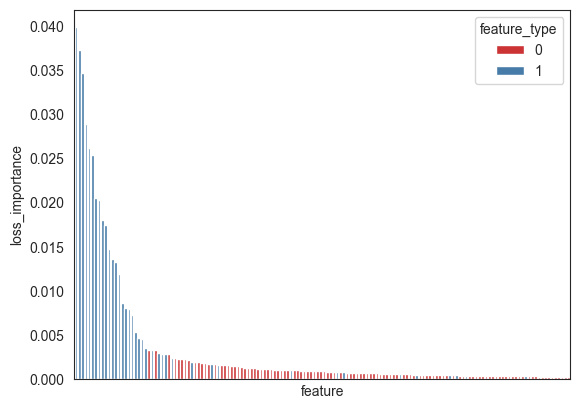

In [57]:
sns.set_style("white")
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(150),
    x="feature",
    y="loss_importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])


[]

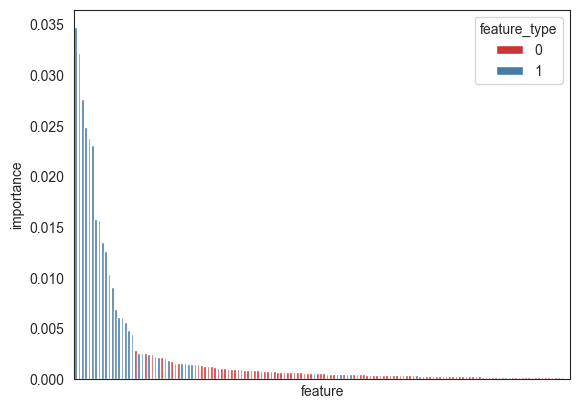

In [58]:
sns.set_style("white")

fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("importance", ascending=False).head(150),
    x="feature",
    y="importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])

[]

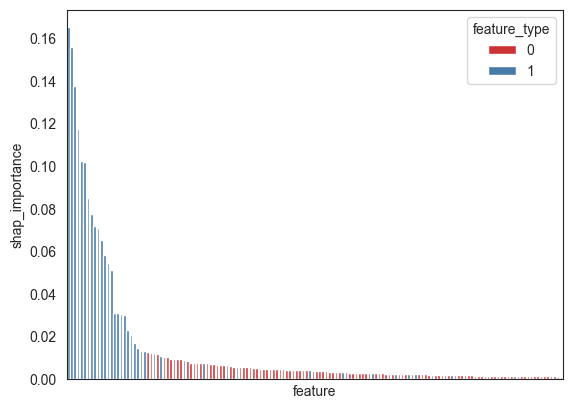

In [59]:
fig, ax = plt.subplots()
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(150),
    x="feature",
    y="shap_importance",
    hue="feature_type",
    palette="Set1",
    ax=ax
)

ax.set_xticks([])

<Axes: xlabel='shap_importance', ylabel='loss_importance'>

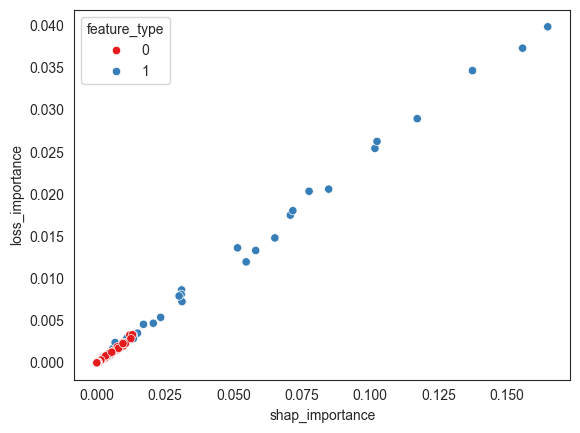

In [60]:
sns.scatterplot(
    data=feature_importances,
    x="shap_importance",
    y="loss_importance",
    hue="feature_type",
    palette="Set1",
)

<Axes: xlabel='importance', ylabel='loss_importance'>

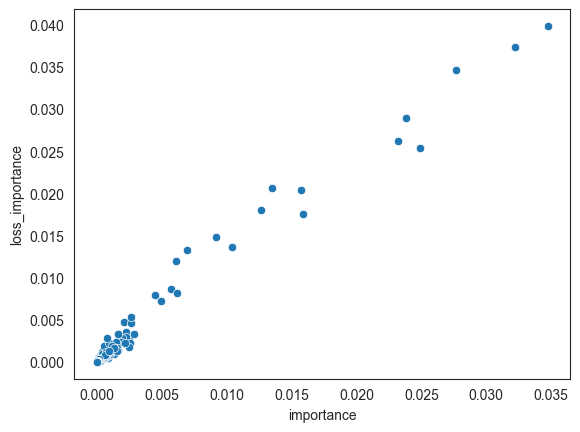

In [61]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='shap_importance'>

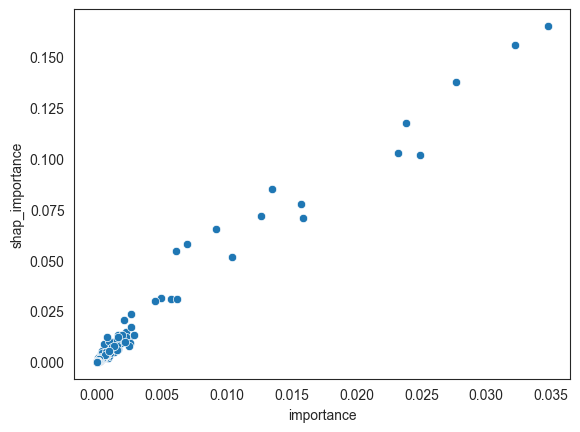

In [62]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="shap_importance",
)

In [63]:
loss_top = feature_importances.sort_values('loss_importance', ascending=False).head(100)
loss_top[loss_top['feature_num'] > 100].shape[0]

66

In [64]:
importance_top = feature_importances.sort_values('importance', ascending=False).head(100)
importance_top[importance_top['feature_num'] > 100].shape[0]

66

In [65]:
shap_top = feature_importances.sort_values('shap_importance', ascending=False).head(100)
shap_top[shap_top['feature_num'] > 100].shape[0]

66

In [69]:
feature_importances['linear_weights'] = clf.feature_importances_

In [70]:
linear_top = feature_importances.sort_values('linear_weights', ascending=False).head(100)
linear_top[linear_top['feature_num'] > 100].shape[0]

64

<Axes: xlabel='loss_importance', ylabel='linear_weights'>

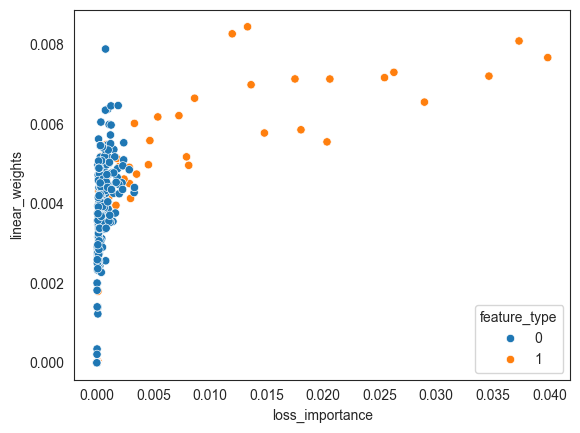

In [71]:
sns.scatterplot(
    data=feature_importances,
    x="loss_importance",
    y="linear_weights",
    hue="feature_type",
)

In [73]:
feature_importances.sort_values('loss_importance', ascending=False).head(100)

,feature,importance,pvalue,feature_diff,loss_importance,feature_num,feature_type,shap_importance,linear_weights
13,Protein_14,0.034738,3.480136e-13,2.576504,0.039863,14,1,0.165079,0.007675
60,Protein_61,0.032208,7.987056e-11,2.409246,0.037326,61,1,0.155875,0.008093
47,Protein_48,0.027698,3.995640e-09,2.227215,0.034664,48,1,0.137524,0.007209
68,Protein_69,0.023838,9.049424e-09,2.204364,0.028961,69,1,0.117296,0.006555
46,Protein_47,0.023184,2.141776e-07,2.030559,0.026261,47,1,0.102579,0.007304
...,...,...,...,...,...,...,...,...,...
1091,Protein_1092,0.000438,8.315962e-01,0.013385,0.000626,1092,0,0.002815,0.004188
1217,Protein_1218,0.000363,1.879119e-03,0.204916,0.000623,1218,0,0.002742,0.004858
2044,Protein_2045,0.000346,1.116866e-01,0.099378,0.000621,2045,0,0.002890,0.003880
20,Protein_21,0.000396,4.672433e-03,1.110363,0.000617,21,1,0.002502,0.003669
